# SNI - Sensor Networks Inc

## Environment Setup

In [14]:
import difflib
import json
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import sys
sys.path.insert(0, '..')
import warnings
import zlib

# local
from libs.interfaces.rolodex_interface import rolodex_load
from libs.viz.utils import add_vbar_labels, add_hbar_labels

## Settings

In [2]:
plt.style.use('dark_background')
#sns.set_style('darkgrid')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

warnings.filterwarnings('ignore')

wd = os.getcwd()
print(wd)

C:\Users\tom.fiorelli\Documents\GitHub\davos-data-project\notebooks


## Read Data

In [6]:
sni_df = pd.read_csv('../data/raw_data/sni/sni_sample.csv')

In [10]:
sni_df['datetime'] = pd.to_datetime(sni_df['Time/Date (UTC)'])

In [11]:
sni_df.head()

,Time/Date (UTC),Thickness Alarm State,Corrosion Alarm State,Temperature Alarm State,Battery Alarm State,Signal Level Alarm State,Thickness in,Temp. Compensated Thickness in,Material Temperature deg F,DSI Temperature deg F,Reference Velocity in/usec,Temp. Compensated Velocity in/usec,Corrosion Rate (short term)in/yr,End of Life (short term),Battery (%),Signal (%),Corrosion Rate (long term)in/yr,End of Life (long term),Thickness Alarm Threshold,Thickness Warning Threshold,Corrosion Alarm Threshold,Corrosion Warning Threshold,Low Temperature Alarm Threshold,High Temperature Alarm Threshold,Company,Site,Plant,Asset,Collection Point,TML,datetime
0,11/27/2023 16:09,warning,NaN,NaN,NaN,NaN,0.2144,0.2116,218.30,69.566,0.2273,0.2244,0.0,-,73%,66%,0.0,-,0.2,0.3,0,0,NaN,NaN,Valero Port Arthur Refinery,DHT-246,C-3214 Inlet WW Piping,Circuit 010C – 1,S0106M,#S0106M-1,2023-11-27 16:09:00
1,11/26/2023 15:24,warning,NaN,NaN,NaN,NaN,0.2144,0.2116,222.80,83.570,0.2273,0.2243,0.0,-,73%,66%,0.0,-,0.2,0.3,0,0,NaN,NaN,Valero Port Arthur Refinery,DHT-246,C-3214 Inlet WW Piping,Circuit 010C – 1,S0106M,#S0106M-1,2023-11-26 15:24:00
2,11/25/2023 14:58,warning,NaN,NaN,NaN,NaN,0.2142,0.2115,213.80,73.274,0.2273,0.2244,0.0,-,73%,66%,0.0,-,0.2,0.3,0,0,NaN,NaN,Valero Port Arthur Refinery,DHT-246,C-3214 Inlet WW Piping,Circuit 010C – 1,S0106M,#S0106M-1,2023-11-25 14:58:00
3,11/24/2023 14:28,warning,NaN,NaN,NaN,NaN,0.2142,0.2116,212.36,67.856,0.2273,0.2245,0.0,-,73%,53%,0.0,-,0.2,0.3,0,0,NaN,NaN,Valero Port Arthur Refinery,DHT-246,C-3214 Inlet WW Piping,Circuit 010C – 1,S0106M,#S0106M-1,2023-11-24 14:28:00
4,11/23/2023 13:52,warning,NaN,NaN,NaN,NaN,0.2143,0.2116,213.26,62.420,0.2273,0.2245,0.0,-,73%,60%,0.0,-,0.2,0.3,0,0,NaN,NaN,Valero Port Arthur Refinery,DHT-246,C-3214 Inlet WW Piping,Circuit 010C – 1,S0106M,#S0106M-1,2023-11-23 13:52:00


In [8]:
sni_df.shape

(283, 30)

In [23]:
def plot_line(x, y, x_is_time, title):
    """
    Plot line
    """

    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (16,8)
    
    plt.plot(x, y)
    
    plt.xticks(rotation=45)
    
    ax.set_title(title, size=20, weight='bold')

    ax.set_ylim(0, max(y)*1.1)

    if x_is_time == True:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

    #ax.legend()
    
    #plt.savefig(
    #    '{}.png'.format(title), 
        #transparent=True
    #)
    
    plt.show()

In [24]:
x = sni_df['datetime']
y = sni_df['Thickness in']
x_is_time = True
title = 'Thickness'

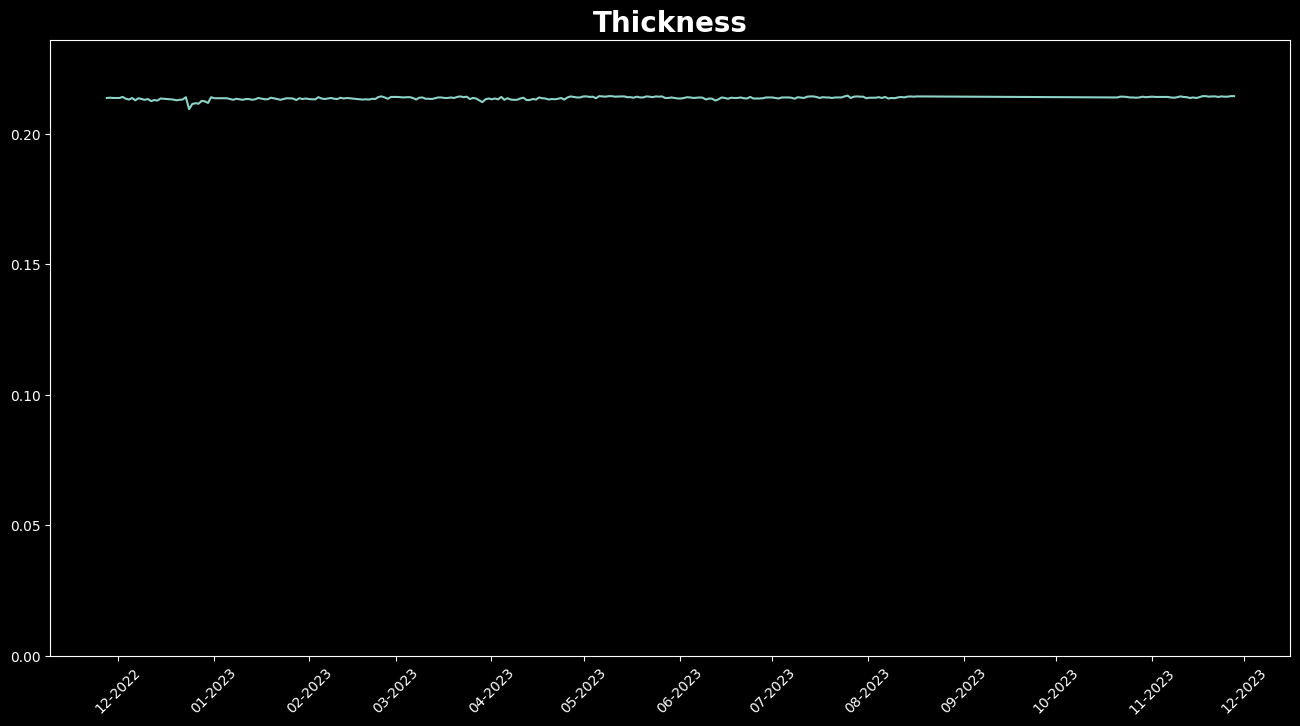

In [25]:
plot_line(x, y, x_is_time, title)

In [26]:
y = sni_df['Temp. Compensated Thickness in']
title = 'Temp. Compensated Thickness'

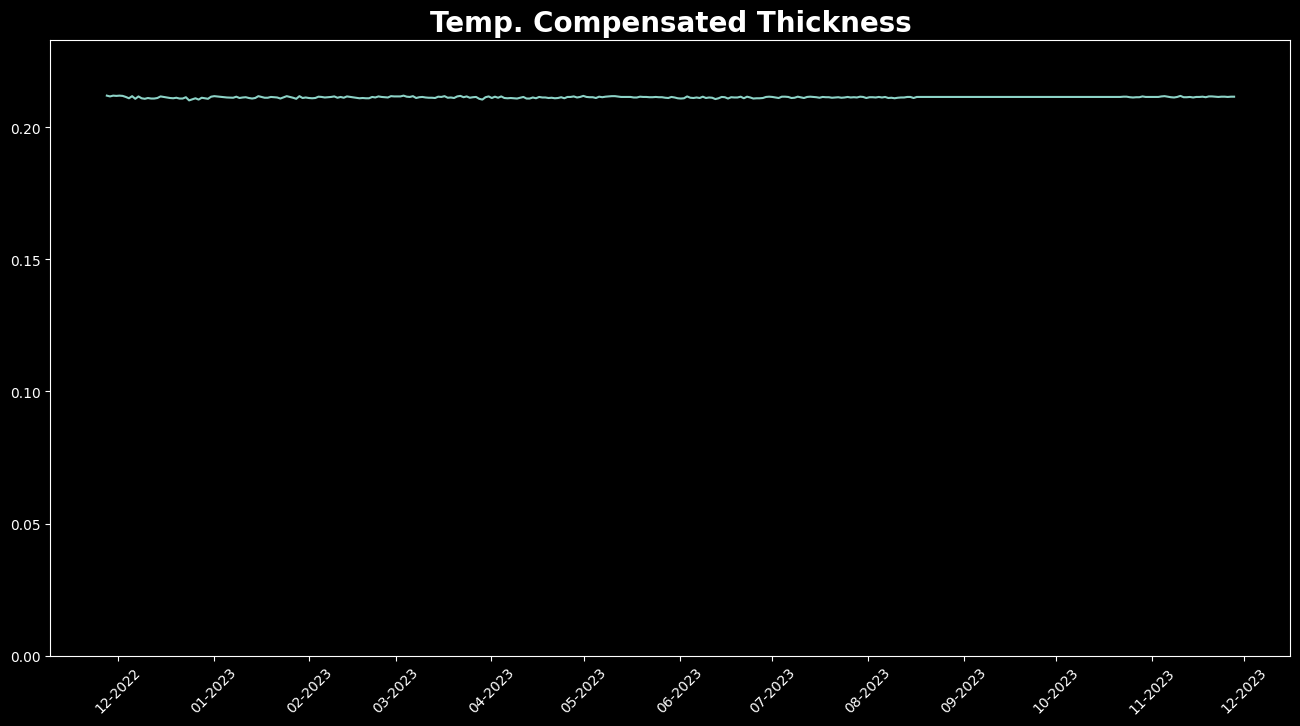

In [27]:
plot_line(x, y, x_is_time, title)

In [31]:
sni_df[sni_df['End of Life (long term)']!='-']['End of Life (long term)'].min()

'1/1/2161'

In [32]:
sni_df[sni_df['End of Life (short term)']!='-']['End of Life (short term)'].min()

'1/10/2036'